In [1]:
f=open("NegInstancesWithDegrees.txt")

In [2]:
lines=[x.strip() for x in f]
f.close()

In [3]:
#for line in lines:
degree_values={}    
for line in lines:
    perinstance_degrees=line.split(":")
    key=perinstance_degrees[0]
    perinstance_degrees_values=perinstance_degrees[1].split(",")
    dic={}
    for perinstance_degrees_value in perinstance_degrees_values:
        temp=perinstance_degrees_value.split("-")
        dic[temp[0]]=temp[1]
    degree_values[key]=dic
#print(degree_values['cabbage/cabbage_1'])

In [4]:
def get_color_features(file_name):
    f=open(file_name)
    lines=[x.split() for x in f]
    result=[]
    for line in lines:
        temp_array=line[0].split(",")
        #temp_array=[int(temp) for temp in temp_array]
        temp_array=[float(temp) for temp in temp_array]
        result.extend(temp_array)
    return result

In [5]:
import os
import numpy as np
import pandas as pd

rootdir = '/Users/adithyabandi/Downloads/Summer18/Negatives/nTz'
feature_set={}
ming=1234
No_features=6255
g=[]
no_of_features_considered=6255
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        file_name=os.path.join(subdir, file)
        if "_shape.log" in file_name:
            temp_array=file_name.split("/")
            temp_array=temp_array[len(temp_array)-1].split("_shape.log")
            features=get_color_features(file_name)
            temp=temp_array[0].split("_")
            
            temp_features=np.zeros(no_of_features_considered)
            g.append(len(features))
            temp_len=len(features)
            if temp_len>no_of_features_considered:
                temp_len=no_of_features_considered
            temp_features[:temp_len]=features[:temp_len]
            feature_set[temp[0]+"/"+temp_array[0]]=list(temp_features)
            
            #feature_set[temp[0]+"/"+temp_array[0]]=features[:No_features]
pd.Series(g).value_counts()

2085    32
1668    15
1251     5
4170     4
2502     4
4587     3
5004     3
834      2
6255     1
5421     1
3753     1
3336     1
dtype: int64

6255

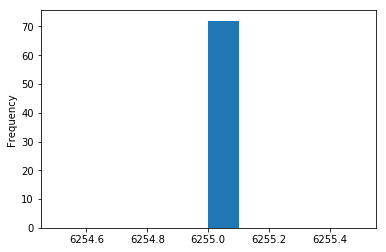

In [6]:
g=[]
for i in feature_set.keys():
    g.append(len(feature_set[i]))
    #print(len(feature_set[i]))
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

pds=pd.Series(g)
pds.plot.hist()
max(g)

In [7]:
import numpy as np
import math


def get_perkey_pos_instances(filename):
    f=open(filename)
    lines=[x.strip() for x in f]
    f.close()
    token_instances={}
    for line in lines:
        temp=line.split(":")
        token_instances[temp[0]]=temp[1]
    #print(token_instances["red"])
    maxv=-1
    minv=10
    perkey_pos_instances={}
    for key,_ in token_instances.items():
        temp_array=token_instances[key].split(",")
        values_arr=[]
        for i in range(len(temp_array)):
            temp2=temp_array[i].split("(")
            if len(temp2)<2:
                continue
            count=int(temp2[1].split(")")[0])
            #print(len(temp_array),count)
            tf=math.log(1+count)
            idf=math.log(72/len(temp_array))
            tf_idf=tf*idf
            #print(count,tf_idf)
            if tf_idf>3:
                if minv>tf_idf:
                    minv=tf_idf
                if maxv<tf_idf:
                    maxv=tf_idf
                values_arr.append(temp2[0])
        perkey_pos_instances[key]=values_arr
    return perkey_pos_instances,maxv,minv

In [8]:
perkey_pos_instances,trmax,trmin=get_perkey_pos_instances("traintokens.txt")
perkeytest_pos_instances,temax,temin=get_perkey_pos_instances("testtokens.txt")
print(temax,temin,perkeytest_pos_instances["circ"])
trmax,trmin,perkey_pos_instances["circ"]

18.949124083180376 3.046000041675236 ['arch/arch_4', 'semicylinder/semicylinder_1']


(14.538677747967474,
 3.001575663704525,
 ['arch/arch_1',
  'arch/arch_2',
  'arch/arch_3',
  'semicylinder/semicylinder_2',
  'semicylinder/semicylinder_3',
  'semicylinder/semicylinder_4'])

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
def gcd(a,b):
    """Compute the greatest common divisor of a and b"""
    while b > 0:
        a, b = b, a % b
    return a
    
def lcm(a, b):
    """Compute the lowest common multiple of a and b"""
    return a * b / gcd(a, b)

In [11]:

import numpy as np

from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

#Scoring and Validating Model
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

def cross_val_results(pos_inputs,neg_inputs,pos_labels,neg_labels,No_features=6255):
    pos_inputs=np.array(pos_inputs)
    neg_inputs=np.array(neg_inputs)
    
    pos_labels=pos_labels.reshape(len(pos_labels),1)
    neg_labels=neg_labels.reshape(len(neg_labels),1)
    
    pos_full=np.concatenate((pos_inputs,pos_labels),axis=1)
    neg_full=np.concatenate((neg_inputs,neg_labels),axis=1)
    
    g=lcm(len(pos_labels),len(neg_labels))
    g=int(g)
    
    if g<40:
        g=g*40
          
    pos_full_upsampled=resample(pos_full,replace=True,n_samples=g,random_state=42)
    
    neg_full_upsampled=resample(neg_full,replace=True,n_samples=g,random_state=42)
    
    all_=np.concatenate((pos_full_upsampled,neg_full_upsampled))
    inputs=all_[:,:No_features]
    labels=all_[:,-1:]
    
    rf_clf=RandomForestClassifier(random_state=42)
    gb_clf=GaussianNB()
    sgd_clf=SGDClassifier(random_state=42)
    rf_clf=RandomForestClassifier(random_state=42)
    gb_clf=GradientBoostingClassifier(random_state=42)
    knn_clf=KNeighborsClassifier()
    sv_clf=SVC(random_state=42)
    lsv_clf=LinearSVC(random_state=42)
    
    scaler=StandardScaler()
    inputs=scaler.fit_transform(inputs)
    
    #pca = PCA(n_components=40)
    #pca.fit(inputs)
    #No_features=40
    #all_[:,:No_features] = pca.transform(inputs)
    #inputs=all_[:,:No_features]
    
    #print(len(pca.explained_variance_ratio_),np.sum(pca.explained_variance_ratio_))
    
    lsv_clf.fit(inputs,labels)
    pred=lsv_clf.predict(inputs)#test_inputs)
    acc_score=accuracy_score(labels,pred)*100
    prec_score=precision_score(labels,pred)*100
    rec_score=recall_score(labels,pred)*100
    f1=f1_score(labels,pred)*100


    #scoring = ['precision_macro', 'recall_macro']
    #cross_val_results=cross_val_score(lsv_clf,inputs,labels,cv=5,scoring="accuracy")
    #cross_val_results=cross_validate(lsv_clf,inputs,labels,cv=5,scoring=scoring)
    #print(cross_val_results.keys())
    #print(cross_val_results)
    #print(np.mean(cross_val_results)*100)
    #print(np.std(cross_val_results)*100)
    return prec_score,rec_score#np.mean(cross_val_results["test_precision_macro"])*100,np.mean(cross_val_results["test_recall_macro"])*100

In [12]:
import numpy as np
import pandas as pd

from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,roc_auc_score
from sklearn.decomposition import PCA

#Scoring and Validating Model
from sklearn.model_selection import cross_val_score

def test_results(pos_inputs,neg_inputs,pos_labels,neg_labels,test_inputs,test_labels,No_features=6255):
    pos_inputs=np.array(pos_inputs)
    neg_inputs=np.array(neg_inputs)
    
    test_inputs=np.array(test_inputs)
    
    pos_labels=pos_labels.reshape(len(pos_labels),1)
    neg_labels=neg_labels.reshape(len(neg_labels),1)
    
    test_labels=test_labels.reshape(len(test_labels),1)
    
    pos_full=np.concatenate((pos_inputs,pos_labels),axis=1)
    neg_full=np.concatenate((neg_inputs,neg_labels),axis=1)
    
    g=lcm(len(pos_labels),len(neg_labels))
    g=int(g)
    
    if g<40:
        g=g*40
          
    pos_full_upsampled=resample(pos_full,replace=True,n_samples=g,random_state=42)
    
    neg_full_upsampled=resample(neg_full,replace=True,n_samples=g,random_state=42)
    
    all_=np.concatenate((pos_full_upsampled,neg_full_upsampled))
    
    inputs=all_[:,:No_features]
    labels=all_[:,-1:]
    
    scaler=StandardScaler()
    inputs=scaler.fit_transform(inputs)
    
    #pca = PCA(n_components=40)
    #pca.fit(inputs)
    #No_features=40
    #all_[:,:No_features] = pca.transform(inputs)
    #inputs=all_[:,:No_features]
    
    #print(pca.explained_variance_ratio_.cumsum())
    
    
    
    rf_clf=RandomForestClassifier(random_state=42)
    gb_clf=GaussianNB()
    sgd_clf=SGDClassifier(random_state=42)
    rf_clf=RandomForestClassifier(random_state=42)
    gb_clf=GradientBoostingClassifier(random_state=42)
    knn_clf=KNeighborsClassifier()
    sv_clf=SVC(kernel="rbf",random_state=42)
    lsv_clf=LinearSVC(random_state=42)
    
    
    lsv_clf.fit(inputs,labels)
    pred=lsv_clf.predict(inputs)#test_inputs)
    acc_score=accuracy_score(labels,pred)*100
    prec_score=precision_score(labels,pred)*100
    rec_score=recall_score(labels,pred)*100
    f1=f1_score(labels,pred)*100
    
    print("train scores:",acc_score,prec_score,rec_score,f1)
    
    #test_inputs=pca.transform(test_inputs)
    
    pred=lsv_clf.predict(test_inputs)
    print(pred)
    acc_score=accuracy_score(test_labels,pred)*100
    prec_score=precision_score(test_labels,pred)*100
    rec_score=recall_score(test_labels,pred)*100
    f1=f1_score(test_labels,pred)*100
    
    
    return acc_score,prec_score,rec_score,f1

In [13]:
def get_pos_neg_instances_per_token(token,accuracy_threshold):
    pos_inputs=[]
    neg_inputs=[]
    neg_instances=[]
    pos_instances=perkey_pos_instances[token]
    test_instances=perkeytest_pos_instances[token]
    for instance in pos_instances:
        pos_inputs.append(feature_set[instance])
    for ins in pos_instances:
        #pos_inputs.append(feature_set[instance])
        temp=degree_values[ins]
        count=0
        for instance in reversed(list(temp.keys())):
            if (instance not in pos_instances) & (instance not in neg_instances) & (instance not in test_instances):
                neg_inputs.append(feature_set[instance])
                pos_labels=np.ones(len(pos_inputs))
                neg_labels=np.zeros(len(neg_inputs))
                g,f=cross_val_results(pos_inputs,neg_inputs,pos_labels,neg_labels)
                #print(len(neg_inputs),g,f)
                if g<accuracy_threshold or f<accuracy_threshold:
                    neg_inputs.remove(feature_set[instance])
                    #print(ins,instance,temp[instance])
                    count+=1
                    g,f=cross_val_results(pos_inputs,neg_inputs,pos_labels,np.zeros(len(neg_inputs)))
                    if count>3:
                        #print("final results",g)
                        break
                    continue
                else:
                    neg_instances.append(instance)
    return pos_instances,neg_instances

In [14]:
def evaluate_samples(pos_instances,neg_instances,test_instances):
    #print(len(pos_instances))
    #print(len(neg_instances))
    neg_inputs=[]
    for instance in neg_instances:
        neg_inputs.append(feature_set[instance])
    pos_inputs=[]
    for instance in pos_instances:
        pos_inputs.append(feature_set[instance])
    test_inputs=[]
    for instance in test_instances:
        test_inputs.append(feature_set[instance])
    pos_labels=np.ones(len(pos_inputs))
    neg_labels=np.zeros(len(neg_inputs))
    test_labels=np.ones(len(test_inputs))
    return test_results(pos_inputs,neg_inputs,pos_labels,neg_labels,test_inputs,test_labels)

In [15]:
#["wedg", "cylind", "squ",  "curv","cuboid",  "semicylind","cub", "triangl", "semicirc", "arch",
tokens= [ "circ",  "rectangul", "triangul", "rectangl"]
#"whit","blu","yellow","red","purpl","orang","green"]

In [18]:
for token in tokens:
    print("token:",token)
    #print("positive_instance cutoff_instance cutoff_degrees")
    pos_instances,neg_instances=get_pos_neg_instances_per_token(token,95)
    print(pos_instances,"\n")
    print(neg_instances,"\n")
    test_score,pre_score,rec_score,f1=evaluate_samples(pos_instances,neg_instances,perkeytest_pos_instances[token])
    print(perkeytest_pos_instances[token])
    print(token,test_score,pre_score,rec_score,f1,len(pos_instances),len(neg_instances),"\n")
    

token: cub


KeyboardInterrupt: 

In [17]:
import pandas as pd
stats=None
for token in tokens:
    temp_df=pd.read_csv("/Users/adithyabandi/Desktop/"+token+"_token.txt",sep=" ")
    temp_df["token"]=token
    if stats is not None:
        stats=stats.append(temp_df)
    else:
        stats=temp_df

FileNotFoundError: File b'/Users/adithyabandi/Desktop/cub_token.txt' does not exist

In [ ]:
stats

In [ ]:
stats.describe()